In [288]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-31 02:47:29,215: Credentials are already in use. The existing account in the session will be replaced.


In [152]:
!pip3 install meilisearch

In [177]:
import meilisearch
import requests
import pprint

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Set the document to index
document = {
    'id': 1,
    'title': 'bible',
    'text': text
}

# Create a MeiliSearch client
client = meilisearch.Client('https://ms-672dc8cf52d6-1321.sfo.meilisearch.io', 'd5282db4870cfedc6b8b4294bf1e495a08680507')

# Create an index for the documents
index = client.index('bible')

# Add the document to the index
index.add_documents([document])



TaskInfo(task_uid=39, index_uid='bible', status='enqueued', type='documentAdditionOrUpdate', enqueued_at='2022-12-31T00:44:01.946031676Z')

In [291]:
# Search for a word in the text
results = index.search('paul')

# Print the search results in a more readable format
#pprint.pprint(results)

In [292]:
#index.search('jesus')

In [293]:
#client.index('bible').search('lord jesus')

In [294]:
import json

# Open the text file and read its contents
with open('bible.txt', 'r') as f:
    text = f.read()

# Split the text into a list of sentences
sentences = text.split('. ')

# Initialize an empty dictionary to store the data
data = {}

# Iterate through the sentences and add them to the dictionary
for i, sentence in enumerate(sentences):
    data[i] = {"sentence": sentence}

# Write the data to a JSON file
with open('bible.json', 'w') as f:
    json.dump(data, f, indent=2)


In [295]:
import requests
import pprint
response = requests.get('https://www.gutenberg.org/cache/epub/10/pg10.txt')

# Search for a word in the text
results = index.search('paul')

# Print the search results in a more readable format
#pprint.pprint(results)


In [308]:
import meilisearch
import requests

def find_most_common_next_word(text, search_word):
    # Split the text into a list of words
    words = text.split()

    # Create a dictionary to store the frequency of each word that follows the search word
    next_word_counts = {}

    # Iterate through the list of words
    for i in range(len(words) - 1):
        # If the current word is the search word, increment the count for the next word in the dictionary
        if words[i] == search_word:
            next_word = words[i + 1]
            if next_word in next_word_counts:
                next_word_counts[next_word] += 1
            else:
                next_word_counts[next_word] = 1

    # Find the word with the highest frequency
    most_common_next_word = None
    highest_count = 0
    for word, count in next_word_counts.items():
        if count > highest_count:
            most_common_next_word = word
            highest_count = count

    return most_common_next_word

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Search for the most common next word after the word "the"
most_common_next_word = find_most_common_next_word(text, "the")

print(f"The most common next word after 'the' is '{most_common_next_word}'.")


The most common next word after 'the' is 'LORD'.


In [309]:
import meilisearch
import requests
import re
import string
import nltk


In [315]:

nltk.download('stopwords')

def find_most_common_next_word(text, search_word):
    # Split the text into a list of words
    words = text.split()

    # Remove punctuation, strange characters, and numbers from the words
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word for word in words if word.isalpha()]

    # Filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Create a dictionary to store the frequency of each word that follows the search word
    next_word_counts = {}

    # Iterate through the list of words
    for i in range(len(words) - 1):
        # If the current word is the search word, increment the count for the next word in the dictionary
        if words[i] == search_word:
            next_word = words[i + 1]
            if next_word in next_word_counts:
                next_word_counts[next_word] += 1
            else:
                next_word_counts[next_word] = 1

    # Find the word with the highest frequency
    most_common_next_word = None
    highest_count = 0
    for word, count in next_word_counts.items():
        if count > highest_count:
            most_common_next_word = word
            highest_count = count

    return most_common_next_word

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Search for the most common next word after the word "your word"
most_common_next_word = find_most_common_next_word(text, "unto")

print(f"The most common next word after 'your word' is '{most_common_next_word}'.")


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The most common next word after 'your word' is 'LORD'.


In [222]:
import meilisearch
import requests
import re
import string
import nltk

nltk.download('stopwords')

def find_most_common_next_word(text, search_word):
    # Split the text into a list of words
    words = text.split()

    # Remove punctuation, strange characters, and numbers from the words
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word for word in words if word.isalpha()]

    # Filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Create a dictionary to store the frequency of each word that follows the search word
    next_word_counts = {}

    # Iterate through the list of words
    for i in range(len(words) - 1):
        # If the current word is the search word, increment the count for the next word in the dictionary
        if words[i] == search_word:
            next_word = words[i + 1]
            if next_word in next_word_counts:
                next_word_counts[next_word] += 1
            else:
                next_word_counts[next_word] = 1

    # Find the word with the highest frequency
    most_common_next_word = None
    highest_count = 0
    for word, count in next_word_counts.items():
        if count > highest_count:
            most_common_next_word = word
            highest_count = count

    return most_common_next_word

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Search for the most common next word after the word "your word"
most_common_next_word = find_most_common_next_word(text, "come")

print(f"The most common next word after 'your word' is '{most_common_next_word}'.")


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The most common next word after 'your word' is 'come'.


In [226]:
import meilisearch
import requests
import re
import string
import nltk

nltk.download('stopwords')

def find_most_common_next_word(text, search_word):
    # Split the text into a list of words
    words = text.split()

    # Remove punctuation, strange characters, and numbers from the words
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word for word in words if word.isalpha()]

    # Filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Create a dictionary to store the frequency of each word that follows the search word
    next_word_counts = {}

    # Iterate through the list of words
    for i in range(len(words) - 1):
        # If the current word is the search word, increment the count for the next word in the dictionary
        if words[i] == search_word:
            next_word = words[i + 1]
            if next_word in next_word_counts:
                next_word_counts[next_word] += 1
            else:
                next_word_counts[next_word] = 1

    # Find the word with the highest frequency
    most_common_next_word = None
    highest_count = 0
    for word, count in next_word_counts.items():
        if count > highest_count:
            most_common_next_word = word
            highest_count = count

    return most_common_next_word

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Search for the most common next word after the word "your word"
most_common_next_word = find_most_common_next_word(text, "LORD")

print(f"The most common next word after 'your word' is '{most_common_next_word}'.")


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The most common next word after 'your word' is 'God'.


In [316]:
text = response.text


In [317]:
lines = text.splitlines()
#pprint.pprint(lines)

In [318]:
documents = []
for i, line in enumerate(lines):
    documents.append({'id': i, 'text': line})



In [319]:
index.add_documents(documents)
#pprint.pprint(documents)

TaskInfo(task_uid=42, index_uid='bible', status='enqueued', type='documentAdditionOrUpdate', enqueued_at='2022-12-31T09:05:06.479180437Z')

In [320]:
import meilisearch
import requests
import re
import string
import nltk
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')

def find_most_common_word(text):
    # Split the text into a list of words
    words = text.split()

    # Remove punctuation, strange characters, and numbers from the words
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word for word in words if word.isalpha()]

    # Filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Count the frequency of each word
    word_counts = Counter(words)

    # Sort the results by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    return sorted_word_counts

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Find the most common words in the text
most_common_words = find_most_common_word(text)

# Extract the words and their frequencies from the results
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Plot the results in a bar chart
plt.bar(words, counts)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in the Text')
plt.show()


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

KeyboardInterrupt



In [1]:
import matplotlib.pyplot as plt
import meilisearch
import requests
import re
import string
import nltk
import pandas as pd
from collections import Counter
import seaborn as sns

nltk.download('stopwords')

def find_most_common_word(text):
    # Split the text into a list of words
    words = text.split()

    # Remove punctuation, strange characters, and numbers from the words
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word for word in words if word.isalpha()]

    # Filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Count the frequency of each word
    word_counts = Counter(words)

    # Sort the results by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    return sorted_word_counts

# Set the URL of the book
url = 'kin'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Find the most common words in the text
most_common_words = find_most_common_word(text)

# Extract the top 10 most common words and their frequencies from the results
top_words = most_common_words[:45]
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a bar plot using seaborn
sns.set_style("darkgrid")
sns.barplot(counts, words)

# Add a grid to the plot
plt.grid(True)

# Rotate the y-axis labels to make them more readable
plt.yticks(rotation=0, fontsize=5)

# Add labels and a title to the plot
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.title('Common Words in the Text')

# Increase the DPI of the plot
plt.gcf().set_dpi(150)

plt.show()



Traceback (most recent call last):
  Input In [1] in <cell line: 2>
    import meilisearch
ModuleNotFoundError: No module named 'meilisearch'

Use %tb to get the full traceback.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
) missing from current font.e-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


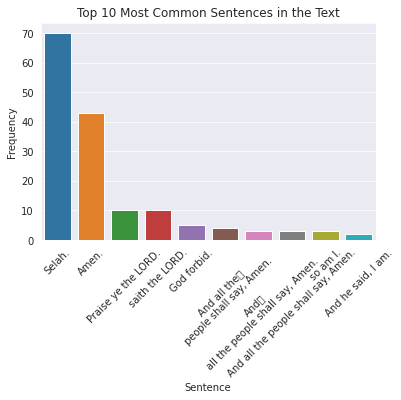

In [10]:
import meilisearch
import requests
import re
import string
import nltk
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

def find_most_common_sentences(text, n=10):
    # Split the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Count the frequency of each sentence
    sentence_counts = Counter(sentences)

    # Sort the results by frequency in descending order
    sorted_sentence_counts = sorted(sentence_counts.items(), key=lambda x: x[1], reverse=True)

    # Create a data frame from the results
    df = pd.DataFrame(sorted_sentence_counts, columns=['Sentence', 'Frequency'])

    # Select the top N rows
    top_sentences = df.head(n)

    return top_sentences

# Set the URL of the book
url = 'https://www.gutenberg.org/cache/epub/10/pg10.txt'

# Download the content of the URL
response = requests.get(url)

# Extract the text of the book from the response
text = response.text

# Find the top 10 most common sentences in the text
top_sentences = find_most_common_sentences(text, n=10)

# Extract the sentences and their frequencies from the data frame
sentences = top_sentences['Sentence'].tolist()
counts = top_sentences['Frequency'].tolist()

# Create a bar plot using seaborn
sns.set_style("darkgrid")
sns.barplot(sentences, counts)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Add labels and a title to the plot
plt.xlabel('Sentence')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Sentences in the Text')

plt.show()


In [11]:
import re
from textblob import TextBlob

# Set the word to search for
search_word = "jessus"

# Create a TextBlob object from the text
blob = TextBlob(text)

# Get a list of misspelled words and their suggested corrections
misspellings = blob.spellcheck()

# Check if the search word is in the list of misspellings
for word, correction in misspellings:
    if search_word.lower() == word.lower():
        # Use the corrected spelling instead
        search_word = correction

# Escape any special characters in the search word
escaped_search_word = re.escape(search_word)

# Compile the regular expression pattern with the IGNORECASE flag
pattern = re.compile(r"\b" + escaped_search_word + r"\b", re.IGNORECASE)

# Use the findall function to count the number of occurrences of the word in the text
count = len(pattern.findall(text))

print(f"The word '{search_word}' appears {count} times in the text.")



Traceback (most recent call last):
  Input In [11] in <cell line: 11>
    misspellings = blob.spellcheck()
AttributeError: 'TextBlob' object has no attribute 'spellcheck'

Use %tb to get the full traceback.


In [12]:
import nltk

# Set the word to search for
search_word = "Jesus"

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Count the number of occurrences of the search word in the list of words
count = words.count(search_word)

print(f"The word '{search_word}' appears {count} times in the text.")


The word 'Jesus' appears 977 times in the text.


In [13]:
import re

# Set the word to search for
search_word = "Jesus"
# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('time', st)]

# Use a regular expression to count the number of occurrences of the word in the text
count = len(re.findall(r"\b" + search_word + r"\b", text))


print(f"The word '{search_word}' appears {count} times in the text.")


The word 'Jesus' appears 977 times in the text.


In [14]:
!pip install wordcloud

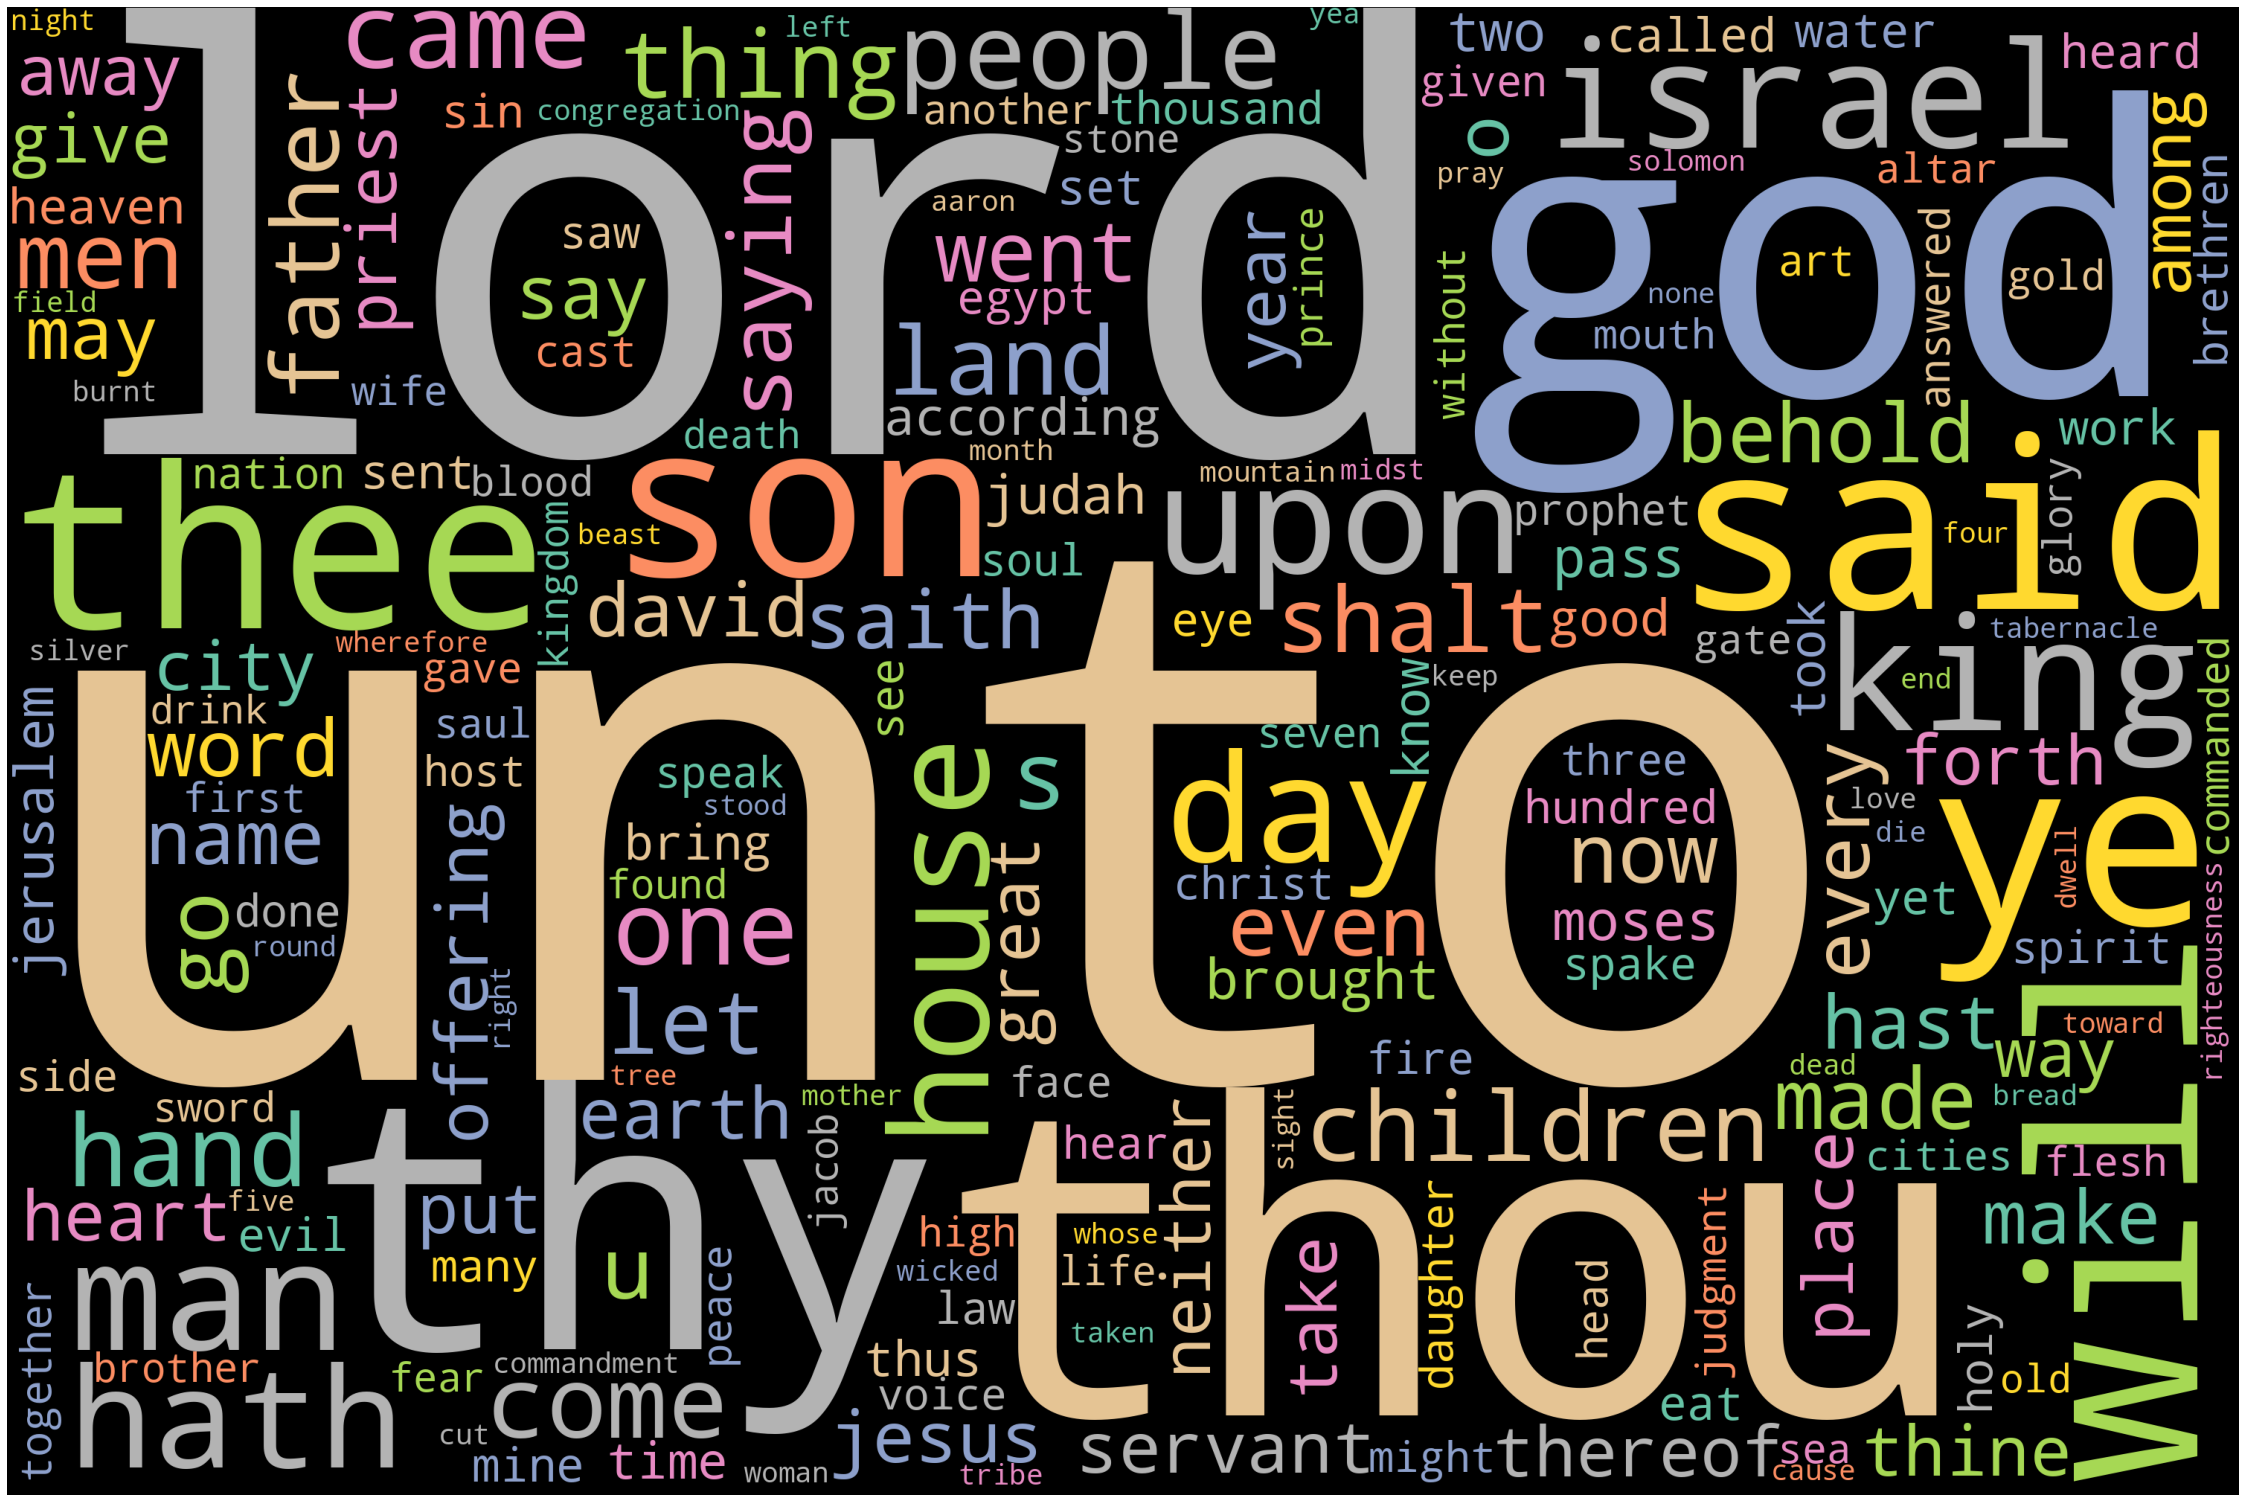

In [19]:
import re
import urllib.request
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('', st)]

# Use a regular expression to count the number of occurrences of the word in the text
count = len(re.findall(r"\b" + search_word + r"\b", text))

# Create a list of tuples where each tuple contains a word and its frequency in the text
word_freq = [(search_word, count)]

# Create a string of all the words in the text
text = ' '.join([' '.join(line) for line in raw_dataset])

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

    
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

# Save image
wordcloud.to_file("wordcloud.png")

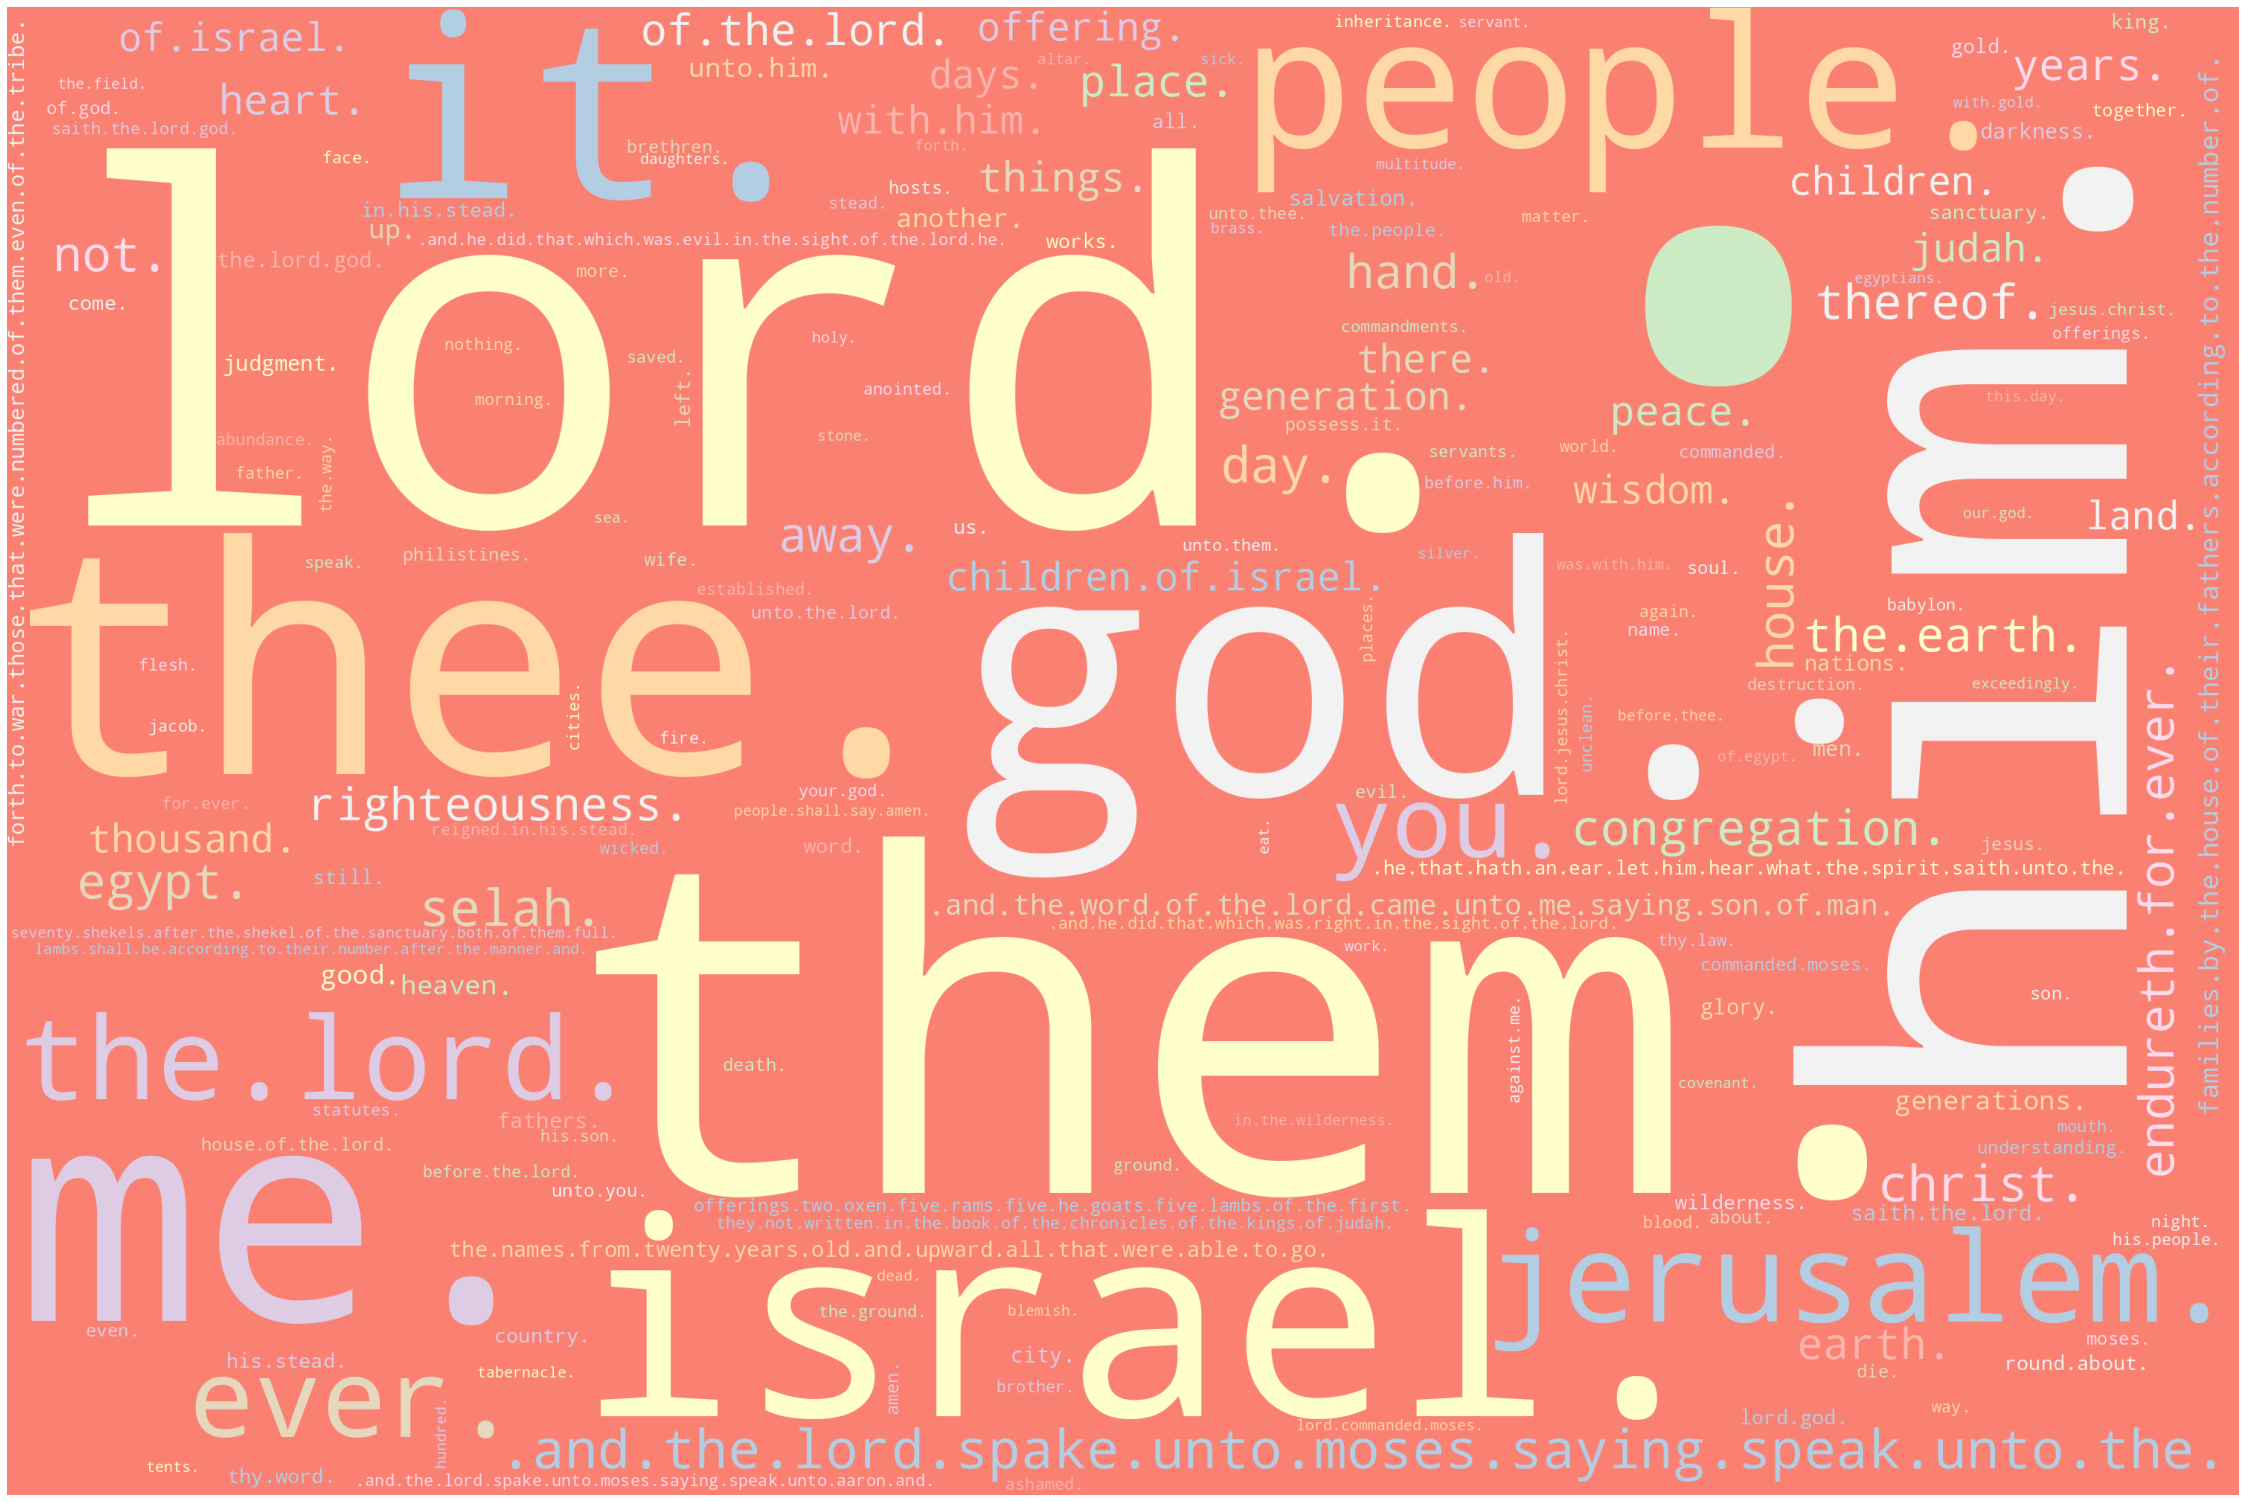

In [ ]:
import re
import urllib.request
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('', st)]

# Create a string of all the words in the text
text = ' '.join([' '.join(line) for line in raw_dataset])

# Create a dictionary with the frequency of each word in the text
word_freq = Counter(text.split())

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, random_state=2, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS)

# Generate the wordcloud from the dictionary of word frequencies
wordcloud.fit_words(word_freq)

# Plot the wordcloud
plot_cloud(wordcloud)


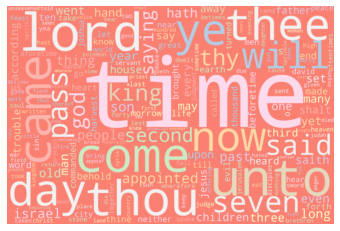

In [403]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    # Display the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot the wordcloud
plot_cloud(wordcloud)


In [454]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Create a list of tuples where each tuple contains a word and its frequency in the text
word_freq = [(text, count)]

# Create a dictionary with the frequency of each word in the text
word_freq = {word: count for word, count in word_freq}

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, random_state=3, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS)

# Generate the wordcloud from the dictionary of word frequencies
wordcloud.fit_words(word_freq)

# Plot the wordcloud
plot_cloud(wordcloud)



KeyboardInterrupt



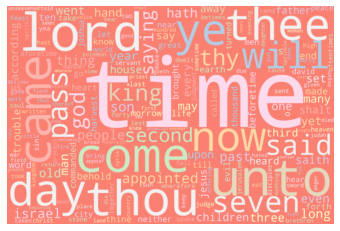

In [401]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    # Display the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot the wordcloud
plot_cloud(wordcloud)


In [407]:
import requests

#Use the text attribute of the Response object to access the contents of the text file.
response = requests.get('https://www.gutenberg.org/cache/epub/10/pg10.txt')
text = response.text

#Split the text into individual lines using the splitlines method of the text variable
lines = text.splitlines()

# create a dictionary for each line of text, with the id field being the line number and the text field being the line of text.
documents = []
for i, line in enumerate(lines):
    documents.append({'id': i, 'text': line})
    
#Use the add_documents method of the index object to add the documents to the MeiliSearch index
index.add_documents(documents)

#Search for a word in the text
results = index.search('the love of God')

##pprint.pprint(results)

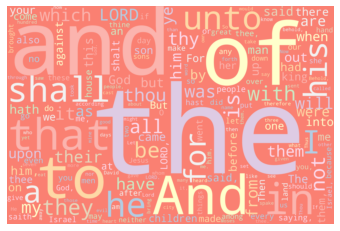

In [415]:
from collections import Counter
# Read the text from a file into a string
with open('bible.txt', 'r') as f:
    text = f.read()

# Create a dictionary with the frequency of each word in the text
word_freq = Counter(text.split())
# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS)

# Generate the wordcloud from the dictionary of word frequencies
wordcloud.fit_words(word_freq)

# Plot the wordcloud
plot_cloud(wordcloud)

# Save the wordcloud as an image file
wordcloud.to_file('wordcloud.png')


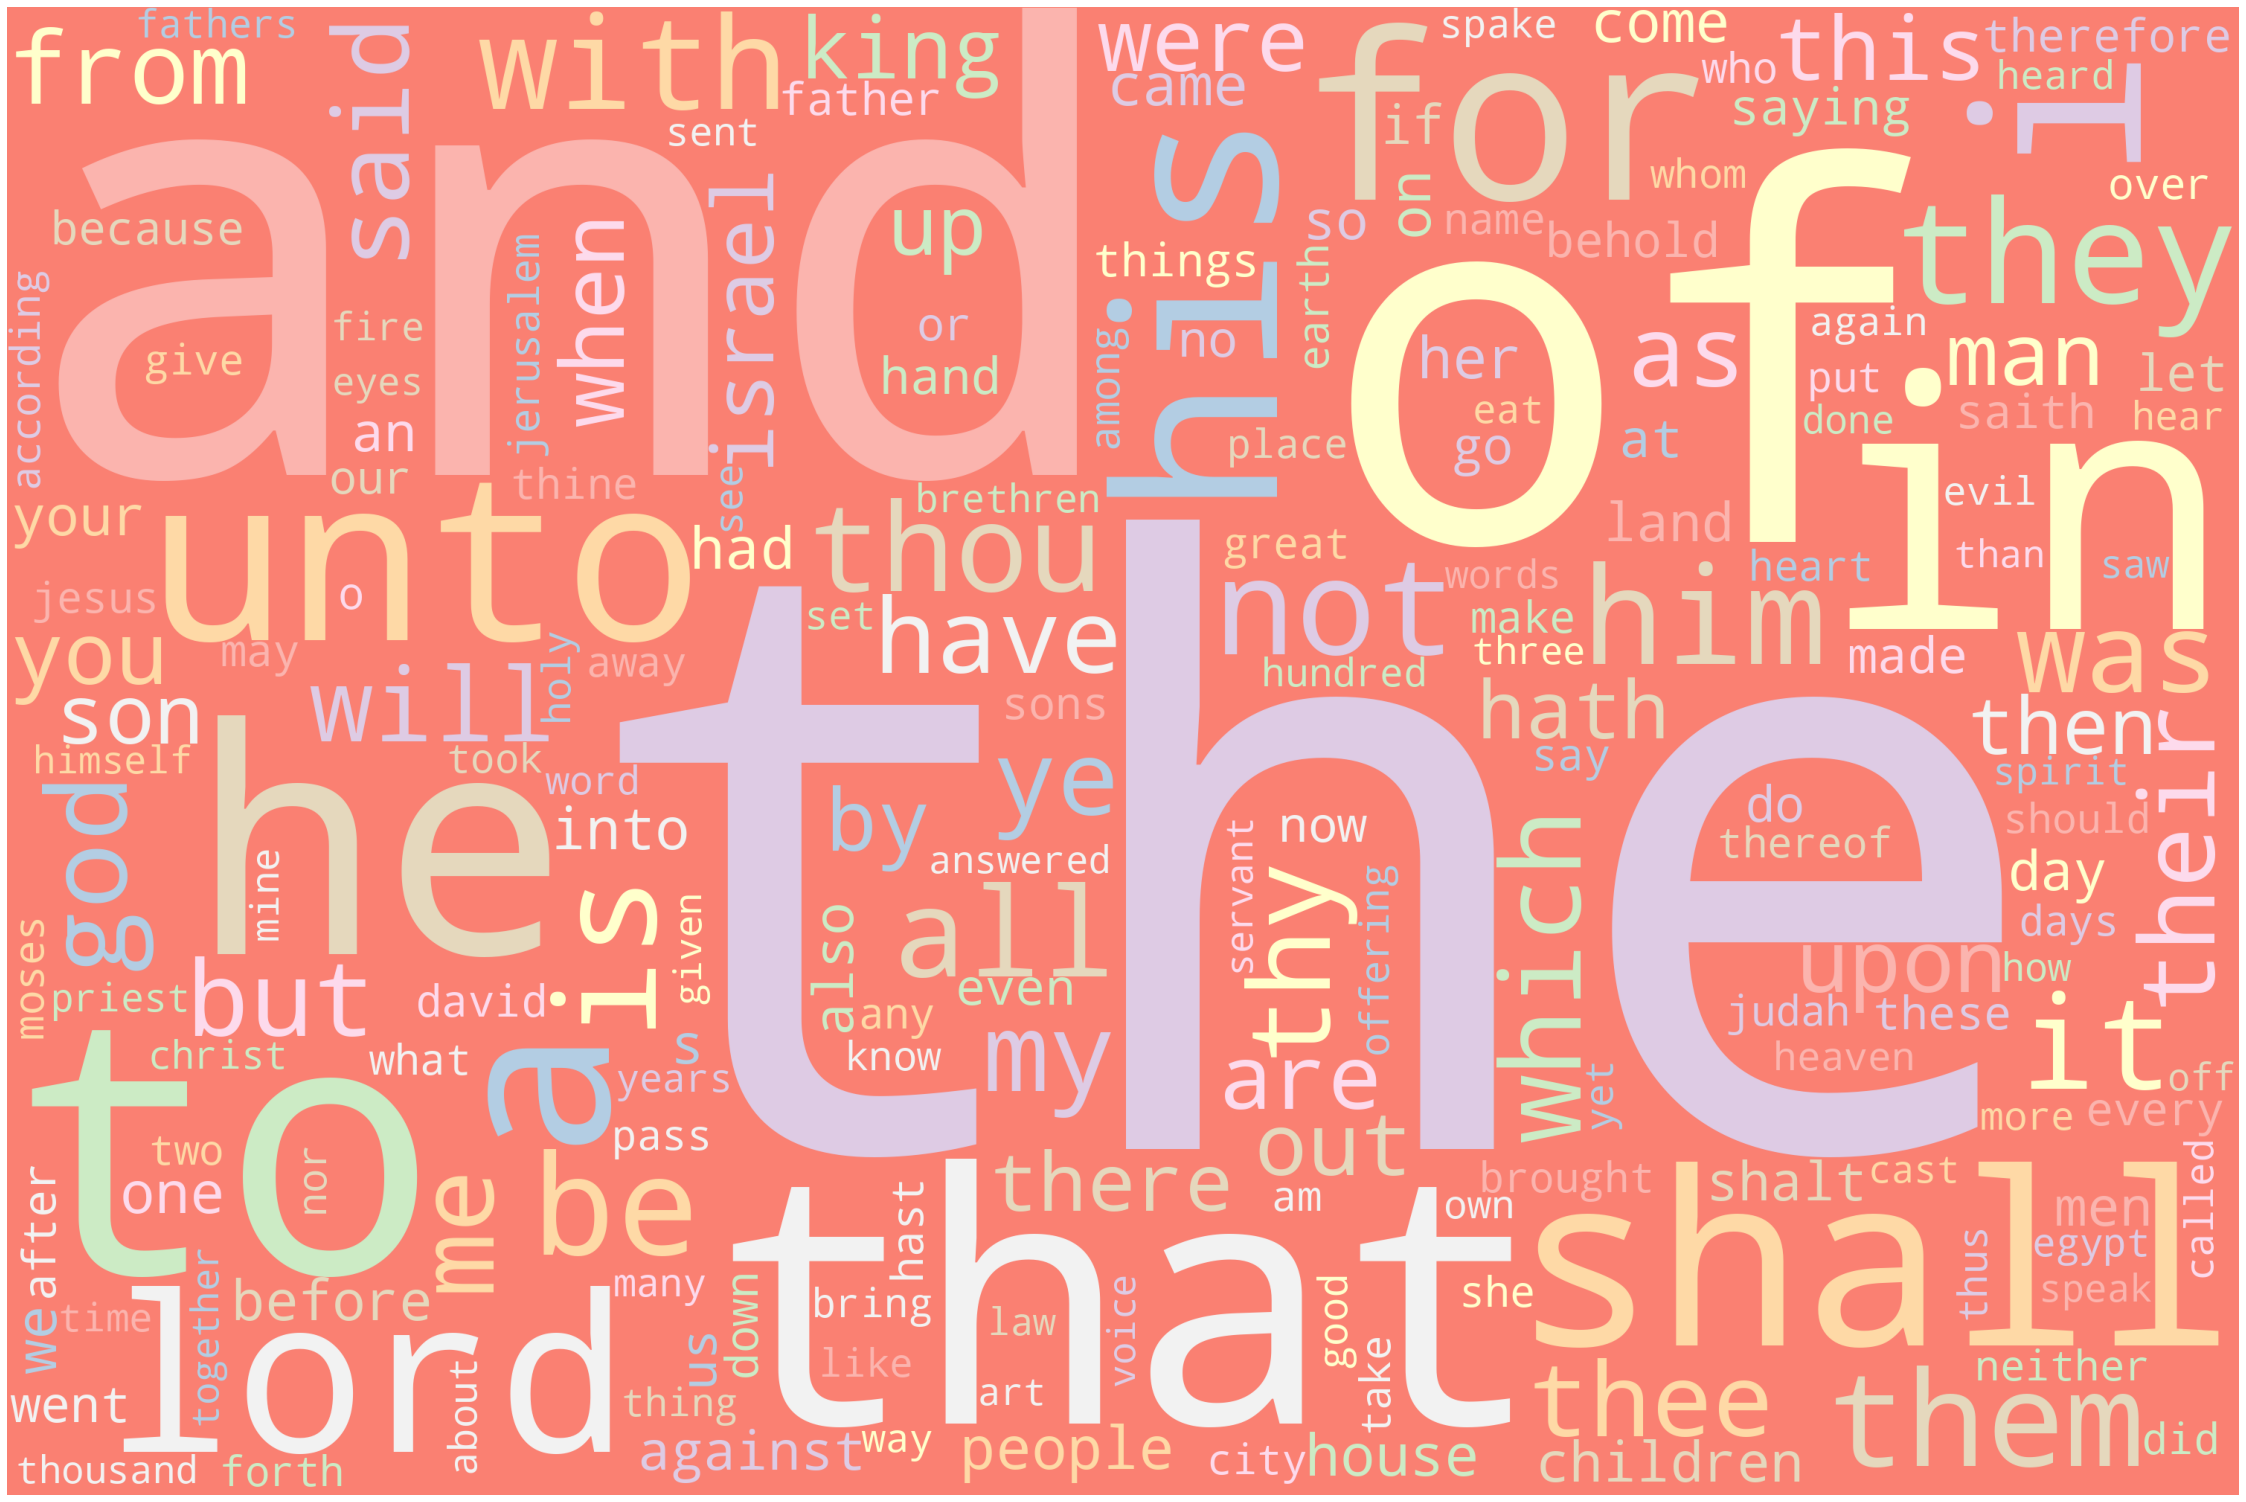

In [421]:
import re
import urllib.request
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Define a function to clean the text
def clean_text(text):
    # Remove email special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

# Define a function to search for a word in the text
def search_word(word, text):
    # Search for the word in the text using the in operator
    if word in text:
        return True
    return False

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Read the text from a file into a string
with open('bible.txt', 'r') as f:
    text = f.read()

# Clean the text
text = clean_text(text)

# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('yes', st)]

# Create a dictionary with the frequency of each word in the text
word_freq = Counter(text.split())


# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS)

# Generate the wordcloud from the dictionary of word frequencies
wordcloud.generate_from_frequencies(word_freq)

# Plot the wordcloud
plot_cloud(wordcloud)

# Save the wordcloud as an image file
wordcloud.to_file('wordcloud.png')


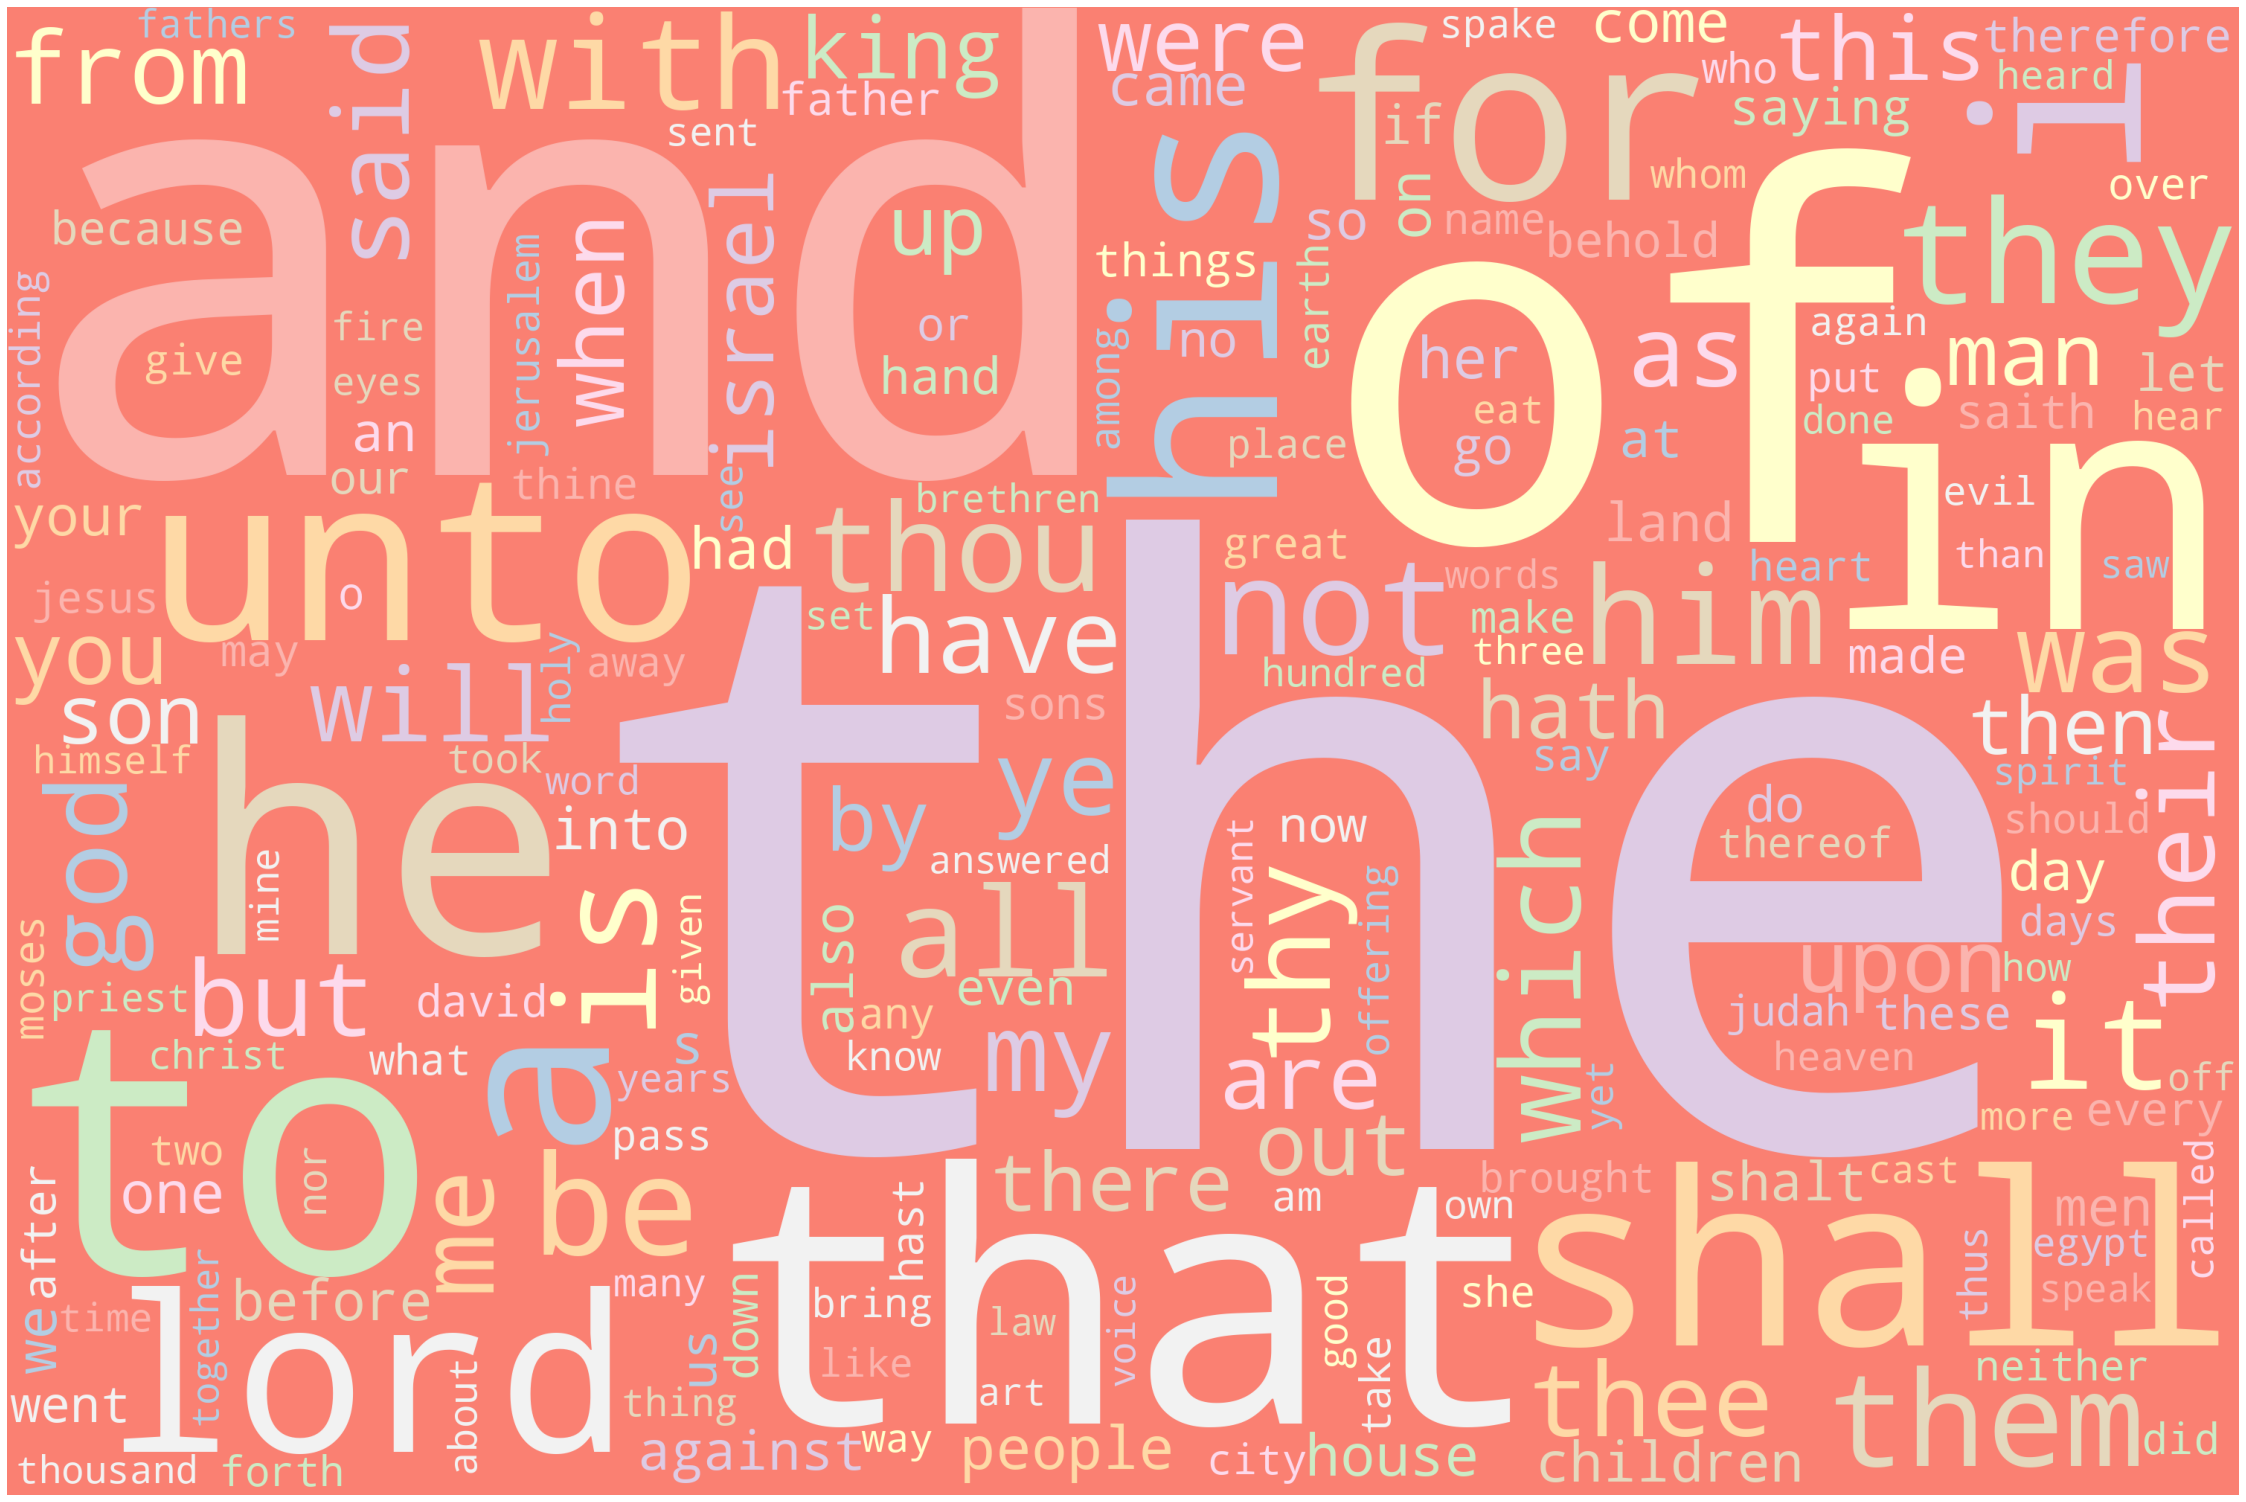

In [429]:
import re
import urllib.request
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Read the text from a file into a string
with open('bible.txt', 'r') as f:
    text = f.read()

# Clean the text
text = clean_text(text)

# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('time', st)]

# Create a dictionary with the frequency of each word in the text
word_freq = Counter(text.split())


# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS)

# Generate the wordcloud from the dictionary of word frequencies
wordcloud.generate_from_frequencies(word_freq)

# Save the wordcloud as an image file
wordcloud.to_file('wordcloud.png')

# Plot the wordcloud
plot_cloud(wordcloud)


In [ ]:
import pandas as pd

# Convert the search results to a Pandas dataframe.
df = pd.DataFrame(results['hits'])

# Print the table.
##print(df)


In [411]:
# Count the number of occurrences of each word in the text column.
counts = df['text'].value_counts()

# Sort the counts in descending order.
counts = counts.sort_values(ascending=False)

# Print the sorted counts.
pprint.pprint(counts)



the love of God in him?  3:18 My little children, let us not love in      1
separate us from the love of God, which is in Christ Jesus our Lord.      1
3:16 Hereby perceive we the love of God, because he laid down his life    1
5:3 For this is the love of God, that we keep his commandments: and       1
4:9 In this was manifested the love of God toward us, because that God    1
3:5 And the Lord direct your hearts into the love of God, and into the    1
13:14 The grace of the Lord Jesus Christ, and the love of God, and the    1
manner of herbs, and pass over judgment and the love of God: these        1
praying in the Holy Ghost, 1:21 Keep yourselves in the love of God,       1
5:42 But I know you, that ye have not the love of God in you.             1
2:5 But whoso keepeth his word, in him verily is the love of God          1
3:4 But after that the kindness and love of God our Saviour toward man    1
of one mind, live in peace; and the God of love and peace shall be        1
5:2 By this 

In [412]:

# Count the number of occurrences of each word in the text column.
counts = df['text'].value_counts()

# Sort the counts in descending order.
counts = counts.sort_values(ascending=False)

# Create a new dataframe with the word and count as separate columns.
counts_df = counts.reset_index()
counts_df.columns = ['text', 'count']

# Merge the counts dataframe with the original dataframe.
merged_df = pd.merge(df, counts_df, on='text')

# Print the merged dataframe.
print(merged_df)



       id                                               text  count
0   98152  the love of God in him?  3:18 My little childr...      1
1   91314  separate us from the love of God, which is in ...      1
2   98147  3:16 Hereby perceive we the love of God, becau...      1
3   98247  5:3 For this is the love of God, that we keep ...      1
4   98202  4:9 In this was manifested the love of God tow...      1
5   95535  3:5 And the Lord direct your hearts into the l...      1
6   93884  13:14 The grace of the Lord Jesus Christ, and ...      1
7   83383  manner of herbs, and pass over judgment and th...      1
8   98472  praying in the Holy Ghost, 1:21 Keep yourselve...      1
9   85654  5:42 But I know you, that ye have not the love...      1
10  98010  2:5 But whoso keepeth his word, in him verily ...      1
11  96209  3:4 But after that the kindness and love of Go...      1
12  93877  of one mind, live in peace; and the God of lov...      1
13  98244  5:2 By this we know that we love the 

In [257]:
import nltk

nltk.corpus.gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [279]:
import nltk
import pprint
# Access the gutenberg corpus
gutenberg = nltk.corpus.gutenberg

# Get a list of the file IDs of the documents in the corpus
fileids = gutenberg.fileids()

# Print the file IDs
print(fileids)


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [260]:
bible = nltk.corpus.gutenberg.words('bible-kjv.txt')
len(bible)

1010654

In [21]:
bible = nltk.Text(nltk.corpus.gutenberg.words('bible-kjv.txt'))
bible.concordance("love")

Displaying 25 of 311 matches:
And make me savoury meat , such as I love , and bring it to me , that I may ea
ed unto him but a few days , for the love he had to her . 29 : 21 And Jacob sa
tion ; now therefore my husband will love me . 29 : 33 And she conceived again
ng mercy unto thousands of them that love me , and keep my commandments . 20 :
if the servant shall plainly say , I love my master , my wife , and my childre
ldren of thy people , but thou shalt love thy neighbour as thyself : I am the 
 one born among you , and thou shalt love him as thyself ; for ye were strange
ng mercy unto thousands of them that love me and keep my commandments . 5 : 11
d is one LORD : 6 : 5 And thou shalt love the LORD thy God with all thine hear
rth . 7 : 7 The LORD did not set his love upon you , nor choose you , because 
th covenant and mercy with them that love him and keep his commandments to a t
nto thy fathers : 7 : 13 And he will love thee , and bless thee , and multiply
d , to walk in all his

In [268]:
bible = nltk.corpus.gutenberg.raw('bible-kjv.txt')


In [271]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)
    
    
    
    

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [274]:
bible = gutenberg.raw('bible-kjv.txt')

In [275]:
len(gutenberg.raw('bible-kjv.txt'))

4332554

In [277]:
bible_sentences = gutenberg.sents('bible-kjv.txt')
bible_sentences

[['[', 'The', 'King', 'James', 'Bible', ']'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ...]

In [280]:
pprint.pprint(bible_sentences)

[['[', 'The', 'King', 'James', 'Bible', ']'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ...]


In [281]:
pprint.pprint(bible_sentences[15])

['1',
 ':',
 '10',
 'And',
 'God',
 'called',
 'the',
 'dry',
 'land',
 'Earth',
 ';',
 'and',
 'the',
 'gathering',
 'together',
 'of',
 'the',
 'waters',
 'called',
 'he',
 'Seas',
 ':',
 'and',
 'God',
 'saw',
 'that',
 'it',
 'was',
 'good',
 '.']


In [287]:
longest_len = max(len(s) for s in bible_sentences)
[s for s in bible_sentences if len(s) == longest_len]

[['15',
  ':',
  '21',
  'And',
  'the',
  'uttermost',
  'cities',
  'of',
  'the',
  'tribe',
  'of',
  'the',
  'children',
  'of',
  'Judah',
  'toward',
  'the',
  'coast',
  'of',
  'Edom',
  'southward',
  'were',
  'Kabzeel',
  ',',
  'and',
  'Eder',
  ',',
  'and',
  'Jagur',
  ',',
  '15',
  ':',
  '22',
  'And',
  'Kinah',
  ',',
  'and',
  'Dimonah',
  ',',
  'and',
  'Adadah',
  ',',
  '15',
  ':',
  '23',
  'And',
  'Kedesh',
  ',',
  'and',
  'Hazor',
  ',',
  'and',
  'Ithnan',
  ',',
  '15',
  ':',
  '24',
  'Ziph',
  ',',
  'and',
  'Telem',
  ',',
  'and',
  'Bealoth',
  ',',
  '15',
  ':',
  '25',
  'And',
  'Hazor',
  ',',
  'Hadattah',
  ',',
  'and',
  'Kerioth',
  ',',
  'and',
  'Hezron',
  ',',
  'which',
  'is',
  'Hazor',
  ',',
  '15',
  ':',
  '26',
  'Amam',
  ',',
  'and',
  'Shema',
  ',',
  'and',
  'Moladah',
  ',',
  '15',
  ':',
  '27',
  'And',
  'Hazargaddah',
  ',',
  'and',
  'Heshmon',
  ',',
  'and',
  'Bethpalet',
  ',',
  '15',
  ':',
  '28